In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, median_absolute_error,r2_score
df = pd.read_excel('2SecondAttempt.xlsx')
df = df.drop(['id'],axis=1)
# Obtener el número de filas
num_filas = df.shape[0]
print(f'Número de instancias: {num_filas}')
# Obtener el número de column#as
num_columnas = df.shape[1]
print(f'Número de propiedades: {num_columnas}')

# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)
# Obtener estadísticas resumidas de las propiedades numéricas
resumen_estadisticas = df.describe()
print('Estadísticas resumidas:\n', resumen_estadisticas)

Número de instancias: 852
Número de propiedades: 16
Nombres de propiedades: Index(['edad', 'E1', 'E2', 'E3', 'E4', 'E5', 'grade_monilla', 'qq',
       'Evapotranspiration_Crop', 'Nvdi', 'Relat_Hum_Max_Temp', 'Temp_Air_Max',
       'Temp_Air_Min', 'Dew_Temp_Max', 'Precipitacion', 'Sunshine_Duration'],
      dtype='object')
Estadísticas resumidas:
              edad          E1          E2          E3          E4          E5  \
count  852.000000  852.000000  852.000000  852.000000  852.000000  852.000000   
mean    10.718310   11.973005    7.573944    5.768779    4.353286    2.435446   
std      2.210007   29.019431   21.684370   20.440204   18.568344   13.456002   
min      2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%     12.000000   12.250000    0.000000    0.000000    0.000000    0.000000   
max

# Matriz de corelación

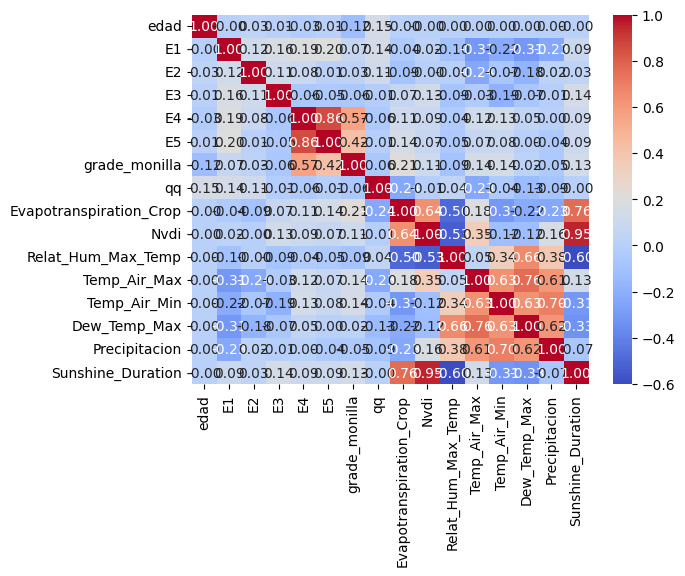

In [4]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Split Data

In [5]:
X = df.drop(['qq'], axis=1)
y = df['qq']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Random Forest Regresor

Métricas de Random Forest Regressor:
Mean Squared Error (MSE): 42.47503350669614
R2 Score: 0.358450089005374
Mean Absolute Error (MAE): 4.805008238828634
Root Mean Squared Error (RMSE): 6.517287281277092
Explained Variance Score: 0.35845276569044515
Median Absolute Error (MedAE): 3.6527657783917995


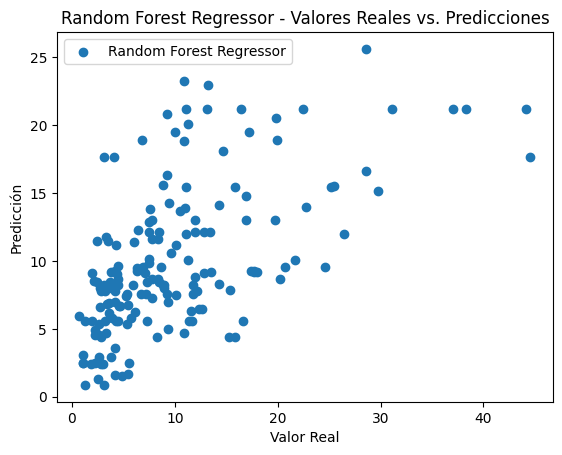

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_regressor.predict(X_test)
# Calcular métricas para Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)
rf_medae = median_absolute_error(y_test, rf_predictions)

# Imprimir las métricas
print("Métricas de Random Forest Regressor:")
print("Mean Squared Error (MSE):", rf_mse)
print("R2 Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Explained Variance Score:", rf_explained_variance)
print("Median Absolute Error (MedAE):", rf_medae)

# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Random Forest Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

## Metrics

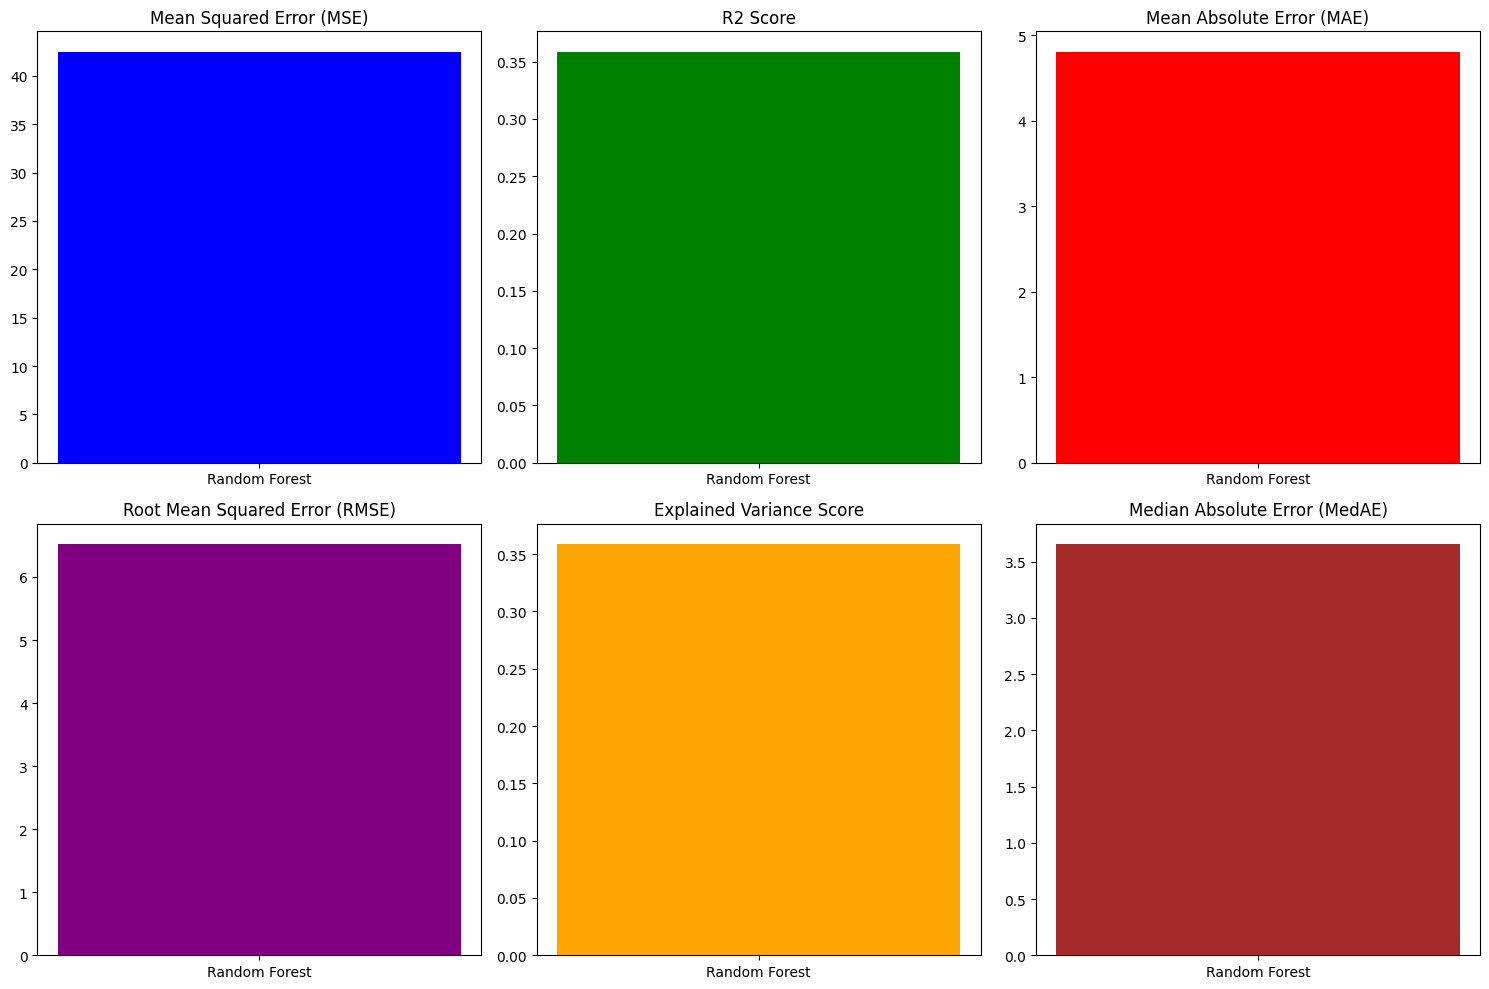

In [7]:
# Definir las métricas de cada modelo
model_names = ['Random Forest']
mse_values = [ rf_mse]
r2_values = [rf_r2]
mae_values = [rf_mae]
rmse_values = [rf_rmse]
explained_variance_values = [rf_explained_variance]
medae_values = [rf_medae]

# Crear subplots para cada métrica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# MSE
axes[0, 0].bar(model_names, mse_values, color='blue')
axes[0, 0].set_title('Mean Squared Error (MSE)')

# R2 Score
axes[0, 1].bar(model_names, r2_values, color='green')
axes[0, 1].set_title('R2 Score')

# MAE
axes[0, 2].bar(model_names, mae_values, color='red')
axes[0, 2].set_title('Mean Absolute Error (MAE)')

# RMSE
axes[1, 0].bar(model_names, rmse_values, color='purple')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# Explained Variance Score
axes[1, 1].bar(model_names, explained_variance_values, color='orange')
axes[1, 1].set_title('Explained Variance Score')

# Median Absolute Error
axes[1, 2].bar(model_names, medae_values, color='brown')
axes[1, 2].set_title('Median Absolute Error (MedAE)')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Cross Validation

5 Folfs

In [8]:
from sklearn.model_selection import cross_val_score

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Aplicar validación cruzada
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='explained_variance')

# Imprimir los resultados de la validación cruzada
print("Puntajes de Validación Cruzada (Explained Variance):", cv_scores)
print("Promedio del Puntaje de Validación Cruzada:", np.mean(cv_scores))


Puntajes de Validación Cruzada (Explained Variance): [0.46929005 0.40398361 0.4272968  0.28260909 0.27018993]
Promedio del Puntaje de Validación Cruzada: 0.3706738949409518


10 Folds

In [9]:
# Aplicar validación cruzada
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10, scoring='explained_variance')

# Imprimir los resultados de la validación cruzada
print("Puntajes de Validación Cruzada (Explained Variance):", cv_scores)
print("Promedio del Puntaje de Validación Cruzada:", np.mean(cv_scores))

Puntajes de Validación Cruzada (Explained Variance): [0.47706923 0.40018508 0.38093718 0.36479854 0.4464482  0.36727512
 0.46484471 0.10204766 0.27277656 0.22620689]
Promedio del Puntaje de Validación Cruzada: 0.3502589171866514



Métricas de la Validación Cruzada (36 Folds) - Random Forest Regressor:
Mean Squared Error (MSE): 31.64236325228125
R2 Score: 0.366665090227725
Mean Absolute Error (MAE): 4.101994933408343
Root Mean Squared Error (RMSE): 5.6251545091918365
Explained Variance Score: 0.36703499652194427
Median Absolute Error (MedAE): 3.009831047619045


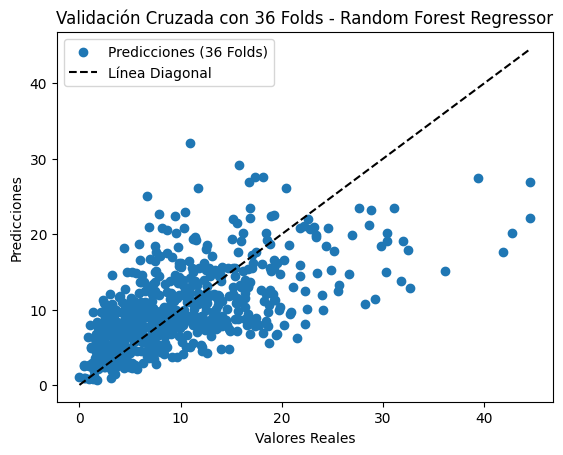


Métricas de la Validación Cruzada (44 Folds) - Random Forest Regressor:
Mean Squared Error (MSE): 32.22398735066829
R2 Score: 0.3550236447725794
Mean Absolute Error (MAE): 4.112626938937599
Root Mean Squared Error (RMSE): 5.676617597713298
Explained Variance Score: 0.3554760891137858
Median Absolute Error (MedAE): 3.0034049682539656


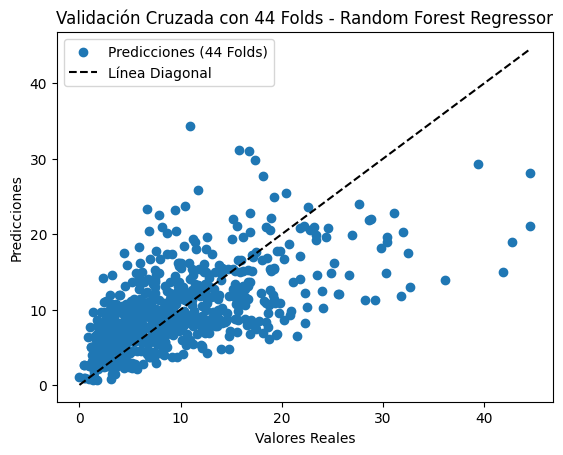


Métricas de la Validación Cruzada (17 Folds) - Random Forest Regressor:
Mean Squared Error (MSE): 31.688288511633687
R2 Score: 0.36574587728031194
Mean Absolute Error (MAE): 4.078487009097024
Root Mean Squared Error (RMSE): 5.6292351622252985
Explained Variance Score: 0.3659735609087562
Median Absolute Error (MedAE): 3.0166080000000015


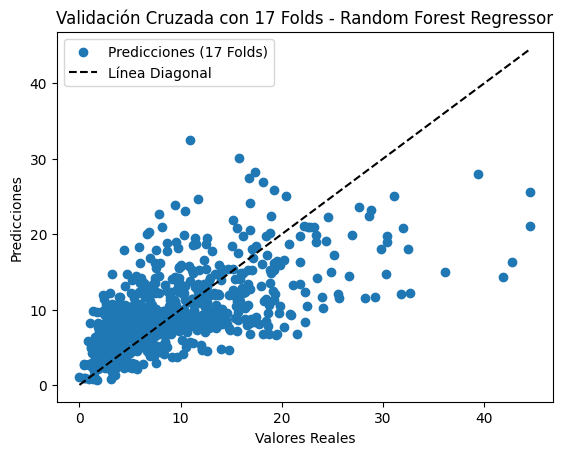


Métricas de la Validación Cruzada (50 Folds) - Random Forest Regressor:
Mean Squared Error (MSE): 32.17286442166917
R2 Score: 0.35604689121491395
Mean Absolute Error (MAE): 4.106746100682662
Root Mean Squared Error (RMSE): 5.672112871026913
Explained Variance Score: 0.356422794170011
Median Absolute Error (MedAE): 2.9527474745747044


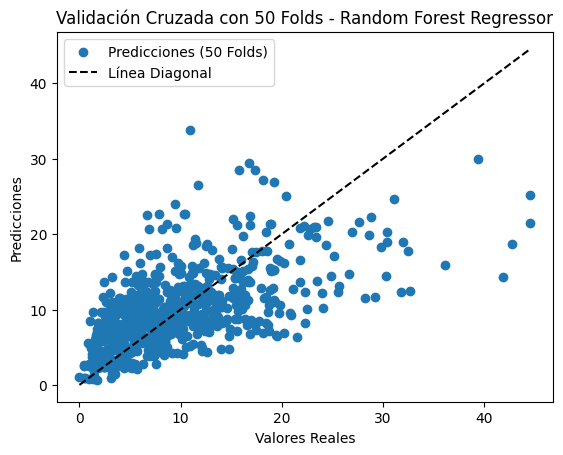

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar validación cruzada y obtener predicciones para 5, 10, 20 y 30 folds
#cv_folds = [5, 10, 20, 30]
cv_folds = np.random.randint(10, 51, size=4)

for folds in cv_folds:
    # Realizar validación cruzada y obtener predicciones
    predicted = cross_val_predict(rf_regressor, X_train, y_train, cv=folds)

    # Calcular métricas
    mse = mean_squared_error(y_train, predicted)
    r2 = r2_score(y_train, predicted)
    mae = mean_absolute_error(y_train, predicted)
    rmse = mean_squared_error(y_train, predicted, squared=False)
    explained_variance = explained_variance_score(y_train, predicted)
    medae = median_absolute_error(y_train, predicted)

    # Imprimir las métricas
    print(f"\nMétricas de la Validación Cruzada ({folds} Folds) - Random Forest Regressor:")
    print("Mean Squared Error (MSE):", mse)
    print("R2 Score:", r2)
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Explained Variance Score:", explained_variance)
    print("Median Absolute Error (MedAE):", medae)

    # Graficar los resultados
    plt.scatter(y_train, predicted, label=f'Predicciones ({folds} Folds)')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', label='Línea Diagonal')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Validación Cruzada con {folds} Folds - Random Forest Regressor')
    plt.legend()
    plt.show()


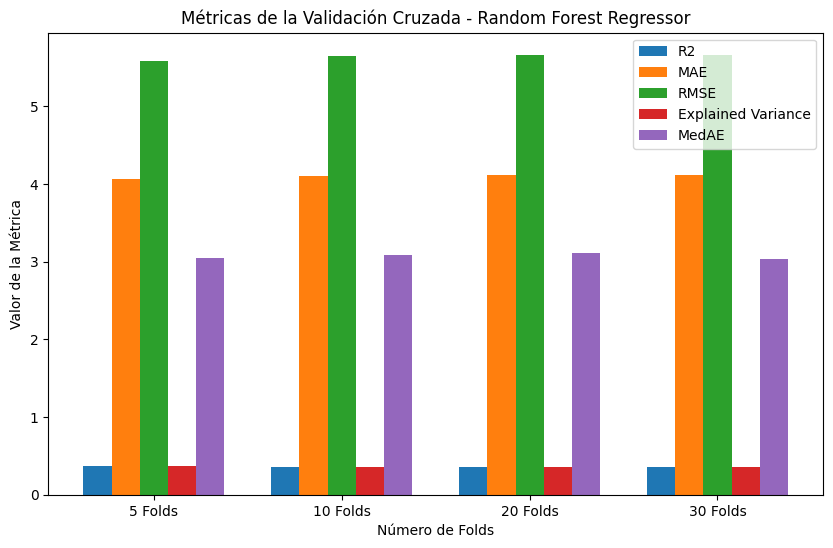

In [16]:
import numpy as np

# Listas para almacenar los resultados de las métricas
mse_values = []
r2_values = []
mae_values = []
rmse_values = []
explained_variance_values = []
medae_values = []

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar validación cruzada y obtener predicciones para 5, 10, 20 y 30 folds
cv_folds = [5, 10, 20, 30]

for folds in cv_folds:
    # Realizar validación cruzada y obtener predicciones
    predicted = cross_val_predict(rf_regressor, X_train, y_train, cv=folds)

    # Calcular métricas
    mse_values.append(mean_squared_error(y_train, predicted))
    r2_values.append(r2_score(y_train, predicted))
    mae_values.append(mean_absolute_error(y_train, predicted))
    rmse_values.append(mean_squared_error(y_train, predicted, squared=False))
    explained_variance_values.append(explained_variance_score(y_train, predicted))
    medae_values.append(median_absolute_error(y_train, predicted))

# Preparar datos para el gráfico de barras
metrics = [ 'R2', 'MAE', 'RMSE', 'Explained Variance', 'MedAE']
values = [ r2_values, mae_values, rmse_values, explained_variance_values, medae_values]

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
bar_positions = np.arange(len(cv_folds))

for i, (metric, value) in enumerate(zip(metrics, values)):
    ax.bar(bar_positions + i * bar_width, value, width=bar_width, label=f'{metric}')

ax.set_xticks(bar_positions + (len(metrics) / 2 - 0.5) * bar_width)
ax.set_xticklabels([f'{folds} Folds' for folds in cv_folds])
ax.set_xlabel('Número de Folds')
ax.set_ylabel('Valor de la Métrica')
ax.set_title('Métricas de la Validación Cruzada - Random Forest Regressor')
ax.legend()

plt.show()


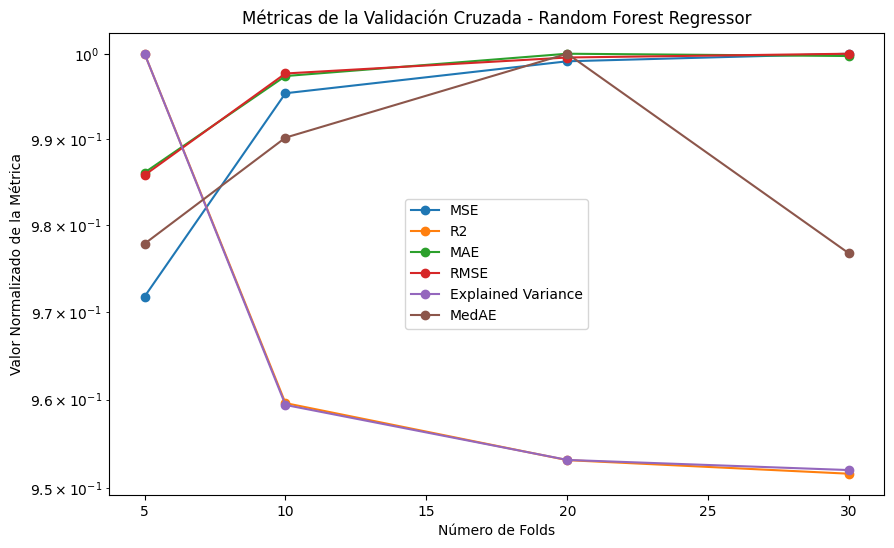

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
from sklearn.model_selection import cross_val_predict

# Listas para almacenar los resultados de las métricas
mse_values = []
r2_values = []
mae_values = []
rmse_values = []
explained_variance_values = []
medae_values = []

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar validación cruzada y obtener predicciones para 5, 10, 20 y 30 folds
cv_folds = [5, 10, 20, 30]

for folds in cv_folds:
    # Realizar validación cruzada y obtener predicciones
    predicted = cross_val_predict(rf_regressor, X_train, y_train, cv=folds)

    # Calcular métricas
    mse_values.append(mean_squared_error(y_train, predicted))
    r2_values.append(r2_score(y_train, predicted))
    mae_values.append(mean_absolute_error(y_train, predicted))
    rmse_values.append(mean_squared_error(y_train, predicted, squared=False))
    explained_variance_values.append(explained_variance_score(y_train, predicted))
    medae_values.append(median_absolute_error(y_train, predicted))

# Normalizar métricas para resaltar variaciones pequeñas
normalized_values = np.array([mse_values, r2_values, mae_values, rmse_values, explained_variance_values, medae_values])

# Normalizar dividiendo por el máximo en cada columna
normalized_values = normalized_values / np.max(normalized_values, axis=1, keepdims=True)

# Preparar datos para el gráfico de línea
metrics = ['MSE', 'R2', 'MAE', 'RMSE', 'Explained Variance', 'MedAE']

# Crear el gráfico de línea con escala logarítmica en el eje y
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.plot(cv_folds, normalized_values[i, :], label=f'{metric}', marker='o')

ax.set_xlabel('Número de Folds')
ax.set_ylabel('Valor Normalizado de la Métrica')
ax.set_title('Métricas de la Validación Cruzada - Random Forest Regressor')
ax.set_yscale('log')  # Escala logarítmica en el eje y
ax.legend()

plt.show()


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_space, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_rf_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
rf_predictions = best_rf_model.predict(X_test)

# Calcular y mostrar las métricas para el mejor modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)
rf_medae = median_absolute_error(y_test, rf_predictions)

print("Métricas del Mejor Modelo (Random Forest Regressor):")
print("Mean Squared Error (MSE):", rf_mse)
print("R2 Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Explained Variance Score:", rf_explained_variance)
print("Median Absolute Error (MedAE):", rf_medae)


Mejores hiperparámetros: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 50}
Métricas del Mejor Modelo (Random Forest Regressor):
Mean Squared Error (MSE): 42.57861818042493
R2 Score: 0.35688552901036796
Mean Absolute Error (MAE): 4.776744163986252
Root Mean Squared Error (RMSE): 6.525229358453612
Explained Variance Score: 0.35727837643310434
Median Absolute Error (MedAE): 3.7055426986377054


Métricas del Mejor Modelo (Random Forest Regressor - Hiperparámetros Optimizados):
Mean Squared Error (MSE): 42.57861818042493
R2 Score: 0.35688552901036796
Mean Absolute Error (MAE): 4.776744163986252
Root Mean Squared Error (RMSE): 6.525229358453612
Explained Variance Score: 0.35727837643310434
Median Absolute Error (MedAE): 3.7055426986377054


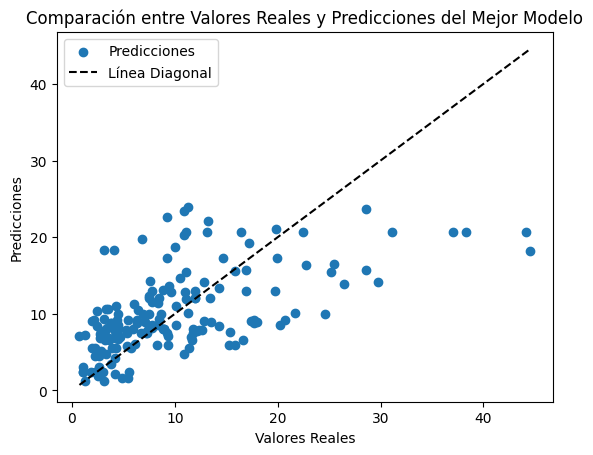

In [14]:
# Obtener el mejor modelo con los hiperparámetros optimizados
best_rf_model = random_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
rf_predictions = best_rf_model.predict(X_test)

# Calcular y mostrar las métricas para el mejor modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)
rf_medae = median_absolute_error(y_test, rf_predictions)

print("Métricas del Mejor Modelo (Random Forest Regressor - Hiperparámetros Optimizados):")
print("Mean Squared Error (MSE):", rf_mse)
print("R2 Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Explained Variance Score:", rf_explained_variance)
print("Median Absolute Error (MedAE):", rf_medae)


# Graficar los resultados
plt.scatter(y_test, rf_predictions, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Línea Diagonal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones del Mejor Modelo')
plt.legend()
plt.show()


##  Gradient Boostig aplying bests hiper parrameterts

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear un modelo de Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Configurar el espacio de búsqueda de hiperparámetros
param_space_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}

# Configurar la búsqueda aleatoria
random_search_gb = RandomizedSearchCV(gb_regressor, param_distributions=param_space_gb, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search_gb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
best_params_gb = random_search_gb.best_params_
print("Mejores hiperparámetros (Gradient Boosting Regressor):", best_params_gb)

# Obtener el mejor modelo
best_gb_model = random_search_gb.best_estimator_

# Realizar predicciones en el conjunto de prueba
gb_predictions = best_gb_model.predict(X_test)

# Calcular y mostrar las métricas para el mejor modelo
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_explained_variance = explained_variance_score(y_test, gb_predictions)
gb_medae = median_absolute_error(y_test, gb_predictions)

print("Métricas del Mejor Modelo (Gradient Boosting Regressor):")
print("Mean Squared Error (MSE):", gb_mse)
print("R2 Score:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("Explained Variance Score:", gb_explained_variance)
print("Median Absolute Error (MedAE):", gb_medae)


KeyboardInterrupt: 

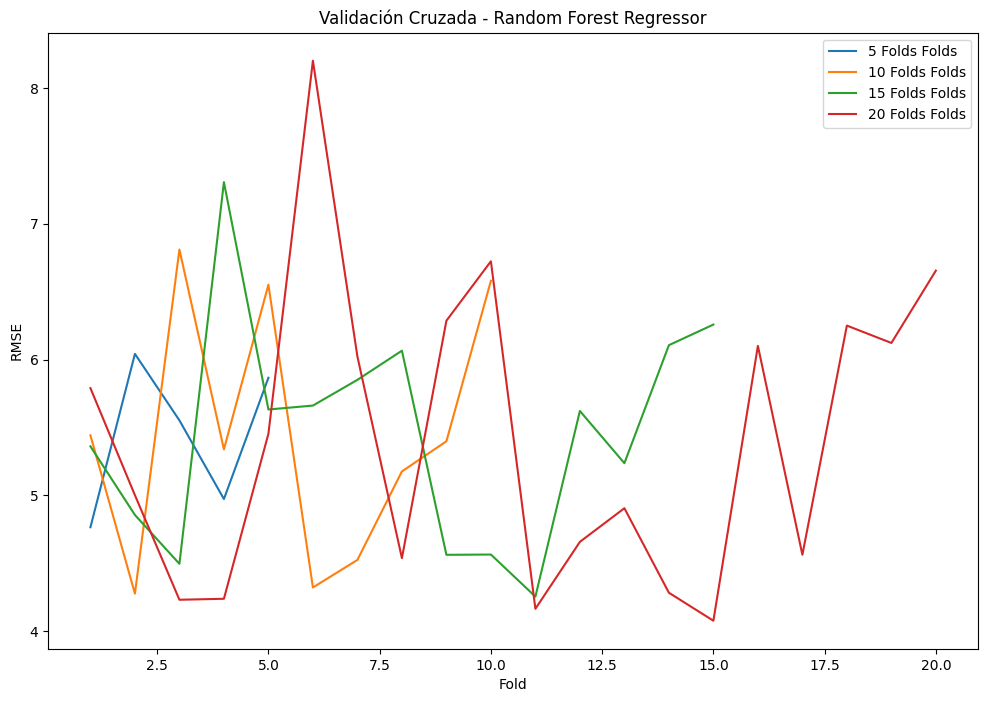

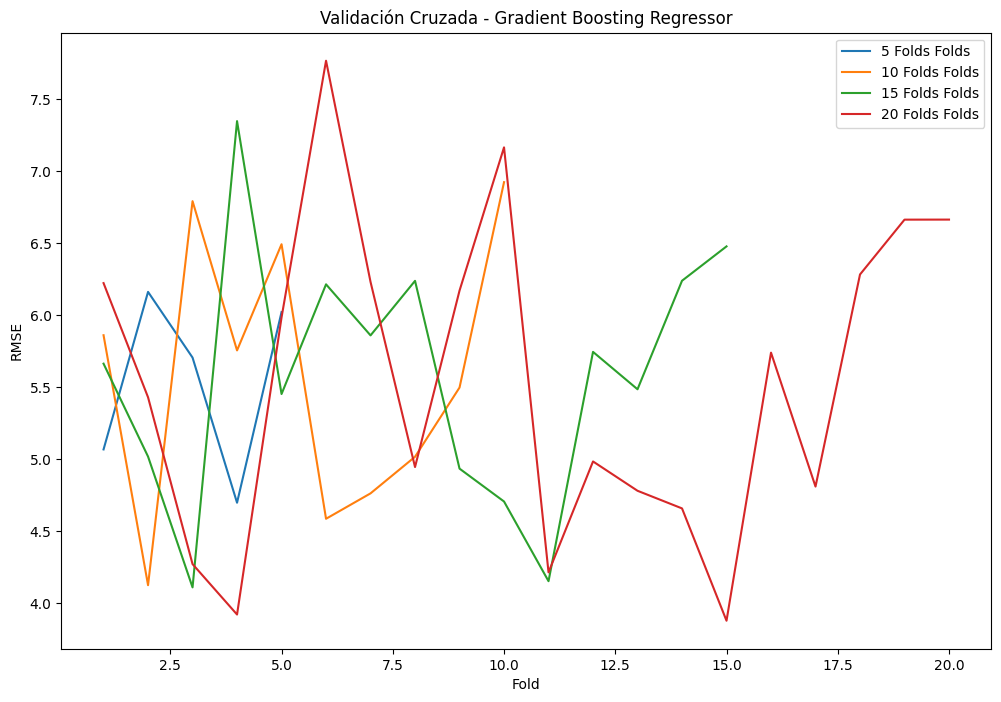

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Función para realizar validación cruzada y obtener métricas
def perform_cross_validation(model, X, y, folds):
    scores = cross_val_score(model, X, y, cv=folds, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

# Función para graficar resultados de validación cruzada
def plot_cross_validation_results(cv_scores, title):
    plt.figure(figsize=(12, 8))
    for folds, scores in cv_scores.items():
        plt.plot(range(1, int(folds.split()[0]) + 1), scores, label=f'{folds} Folds')

    plt.title(title)
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Crear modelos con los mejores hiperparámetros obtenidos
best_rf_model = random_search.best_estimator_
best_gb_model = random_search_gb.best_estimator_

# Realizar validación cruzada para Random Forest Regressor
rf_cv_scores = {}
for folds in [5, 10, 15, 20]:
    scores = perform_cross_validation(best_rf_model, X_train, y_train, folds)
    rf_cv_scores[f'{folds} Folds'] = scores

# Realizar validación cruzada para Gradient Boosting Regressor
gb_cv_scores = {}
for folds in [5, 10, 15, 20]:
    scores = perform_cross_validation(best_gb_model, X_train, y_train, folds)
    gb_cv_scores[f'{folds} Folds'] = scores

# Graficar los resultados
plot_cross_validation_results(rf_cv_scores, 'Validación Cruzada - Random Forest Regressor')
plot_cross_validation_results(gb_cv_scores, 'Validación Cruzada - Gradient Boosting Regressor')
